In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 2.1 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc

In [26]:
data = pd.read_excel('PCA+India+Data_Census.xlsx')
data.head(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [27]:
data.tail(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [29]:
data.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


# Null Values Check

In [30]:
data.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

#Duplicate Value Check

In [31]:
print("Number of null values: ",data.duplicated().sum())

Number of null values:  0


# Part 2.2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

# Gender Ratio calculation

In [32]:
data['Gender_ratio']=data['TOT_M']/data['TOT_F']

In [33]:
data['Gender_ratio'].head(5)

0    0.784938
1    0.847762
2    0.597045
3    0.661912
4    0.686802
Name: Gender_ratio, dtype: float64

# Highest Gender ratio from the code below is a Lashadweep

In [34]:
data['Gender_ratio'].max()

0.8680611968589222

In [35]:
s = data[data['Gender_ratio']>=0.86]
s['State']

586    Lakshadweep
Name: State, dtype: object

# Lowest Gender ratio from the code below is of Andhra Pradesh

In [36]:
data[['Gender_ratio']].min()

Gender_ratio    0.437972
dtype: float64

In [37]:
l =data[data['Gender_ratio']<=0.44]
l['State']

546    Andhra Pradesh
Name: State, dtype: object

# Which district has the highest gender ratio

In [38]:
new = data[data['Gender_ratio']>=0.868061]
new['Dist.Code']

586    587
Name: Dist.Code, dtype: int64

# Which district has the Lowest gender ratio 

In [39]:
data['Gender_ratio'].min()

0.4379722581179062

In [40]:
d =data[data['Gender_ratio']<=0.44]
d['Dist.Code']

546    547
Name: Dist.Code, dtype: int64

# let's create a subset of our data set the perform EDA on selected 5 features

In [41]:
sub_data = data[['TOT_M','TOT_F','M_LIT','MARGWORK_3_6_F','TOT_WORK_M','State']]

In [42]:
sub_data.head(5)

,TOT_M,TOT_F,M_LIT,MARGWORK_3_6_F,TOT_WORK_M,State
0,23388,29796,13381,26044,6723,Jammu & Kashmir
1,19585,23102,10513,18902,6982,Jammu & Kashmir
2,6546,10964,4534,6164,2775,Jammu & Kashmir
3,2784,4206,1842,3088,1002,Jammu & Kashmir
4,20591,29981,13243,22289,5717,Jammu & Kashmir


<AxesSubplot:>

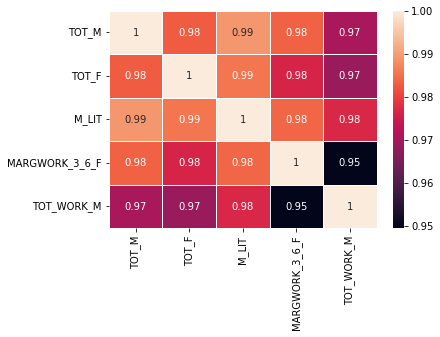

In [43]:
sns.heatmap(sub_data.corr(),annot=True,linewidths=1)

<Figure size 2160x2160 with 0 Axes>

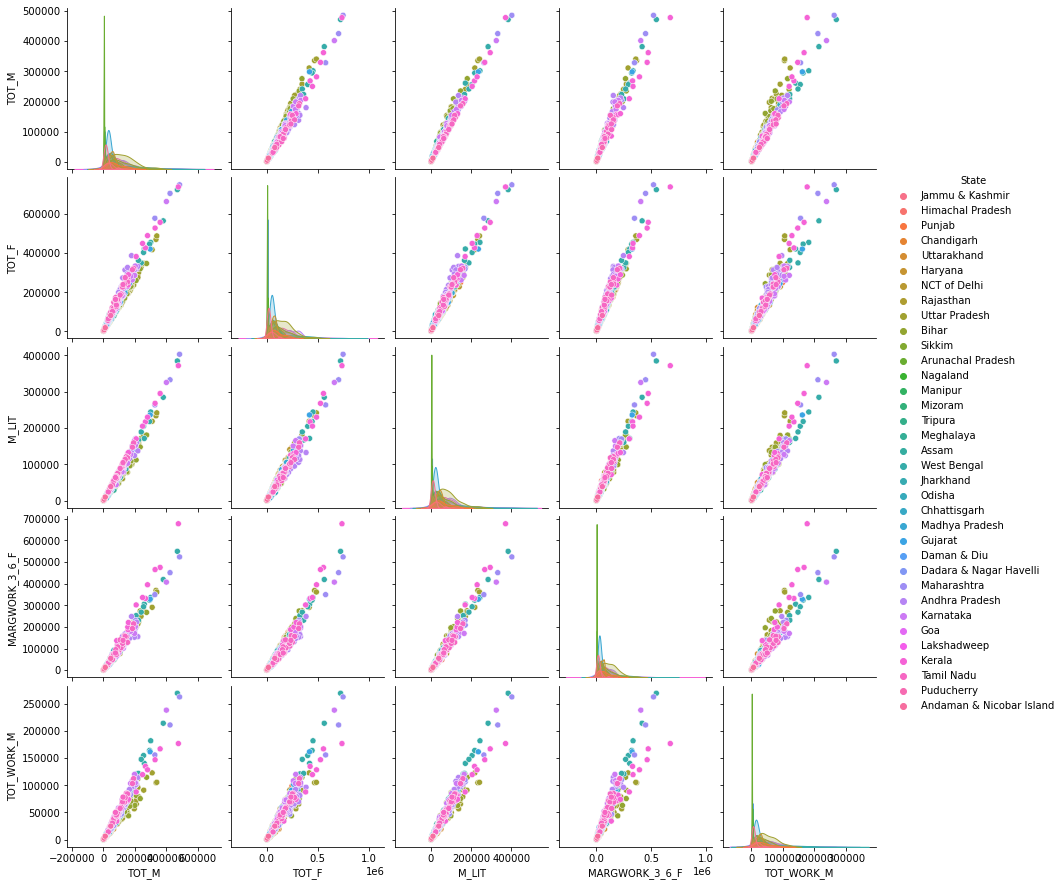

In [44]:
plt.figure(figsize = (30,30))
sns.pairplot(data = sub_data,hue='State')

# Part 2.3 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?
##Yes I think it is neccesary to treat outlier in PCA as it is sensitive to outliers.In our scenario we can see from boxplots below that features does conatain a lot of outlier that need to be treated.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_M'>

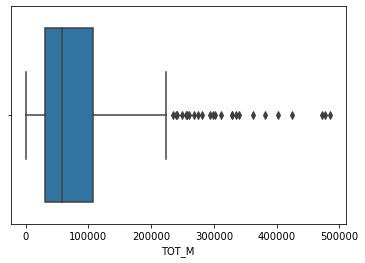

In [45]:
sns.boxplot(data['TOT_M'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_F'>

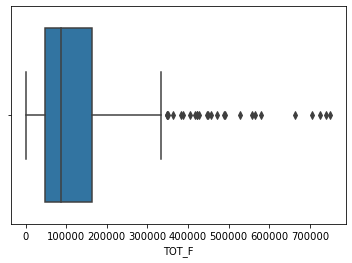

In [46]:
sns.boxplot(data['TOT_F'])

In [47]:
data.drop('State', axis = 1,inplace = True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   Area Name       640 non-null    object 
 3   No_HH           640 non-null    int64  
 4   TOT_M           640 non-null    int64  
 5   TOT_F           640 non-null    int64  
 6   M_06            640 non-null    int64  
 7   F_06            640 non-null    int64  
 8   M_SC            640 non-null    int64  
 9   F_SC            640 non-null    int64  
 10  M_ST            640 non-null    int64  
 11  F_ST            640 non-null    int64  
 12  M_LIT           640 non-null    int64  
 13  F_LIT           640 non-null    int64  
 14  M_ILL           640 non-null    int64  
 15  F_ILL           640 non-null    int64  
 16  TOT_WORK_M      640 non-null    int64  
 17  TOT_WORK_F      640 non-null    int

In [49]:
data.drop('Area Name',axis=1,inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   No_HH           640 non-null    int64  
 3   TOT_M           640 non-null    int64  
 4   TOT_F           640 non-null    int64  
 5   M_06            640 non-null    int64  
 6   F_06            640 non-null    int64  
 7   M_SC            640 non-null    int64  
 8   F_SC            640 non-null    int64  
 9   M_ST            640 non-null    int64  
 10  F_ST            640 non-null    int64  
 11  M_LIT           640 non-null    int64  
 12  F_LIT           640 non-null    int64  
 13  M_ILL           640 non-null    int64  
 14  F_ILL           640 non-null    int64  
 15  TOT_WORK_M      640 non-null    int64  
 16  TOT_WORK_F      640 non-null    int64  
 17  MAINWORK_M      640 non-null    int

In [51]:
from sklearn.preprocessing import  StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaled = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

# Part 2.4 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

# Before scaling

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_M'>

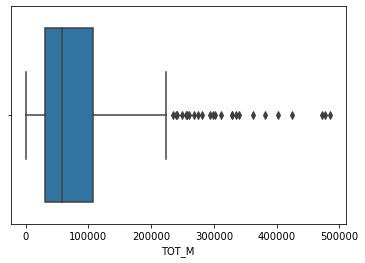

In [54]:
sns.boxplot(data['TOT_M'])

# After scaling

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_M'>

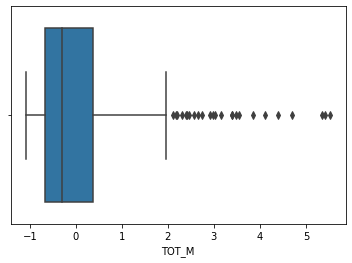

In [55]:
sns.boxplot(scaled['TOT_M'])

# As we can see after scaling the variance has been decreased due to which the oultliers are closely located to other data points thus reducing there effect.

In [65]:
from sklearn.decomposition import PCA

In [66]:
reducer = PCA(n_components=4)

# Part 2.5 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [67]:
C = np.cov(reduced_data, rowvar = False)

In [68]:
C

array([[ 4.40513827e+10, -3.82066706e-07,  1.67154184e-07,
         0.00000000e+00],
       [-3.82066706e-07,  1.51948727e+09,  1.07456261e-07,
        -2.38791691e-08],
       [ 1.67154184e-07,  1.07456261e-07,  1.26894306e+09,
         1.19395846e-08],
       [ 0.00000000e+00, -2.38791691e-08,  1.19395846e-08,
         3.67892434e+08]])

In [69]:
import numpy as np
eigenvalues,eigenvectors = np.linalg.eig(C)

In [70]:
print("The eigen values and eigen vectors are : ",eigenvalues,eigenvectors)

The eigen values and eigen vectors are :  [4.40513827e+10 1.51948727e+09 1.26894306e+09 3.67892434e+08] [[ 1.00000000e+00 -8.98306322e-18  3.90707461e-18  2.32063675e-34]
 [ 0.00000000e+00 -1.00000000e+00  2.06985419e-16  2.07357384e-17]
 [ 0.00000000e+00 -2.85598855e-17 -1.00000000e+00 -1.32507367e-17]
 [ 0.00000000e+00  1.16158094e-16  2.65504215e-16  1.00000000e+00]]


# Part 2.6 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [71]:
reduced_data = reducer.fit_transform(data)
explained_variance = np.var(reduced_data, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
var = np.cumsum(explained_variance_ratio)

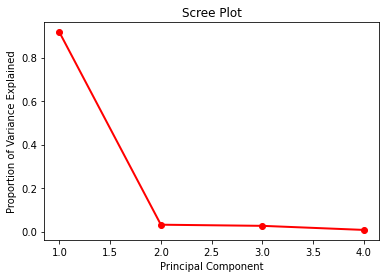

In [73]:
PC_values = np.arange(reducer.n_components_) + 1
plt.plot(PC_values, reducer.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# The graph tells the first principal component captures about 95% of the information present in the original mathematical space i.e. explains ~ 95% of the variation in the data. On taking the first two components together, the total explained variation is close to 98% and when taking the first three components, then the cumulative explained variation is ~ 98% and ~ 99% of the variation is captured by the first four principal components. 

# Part 2.7 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

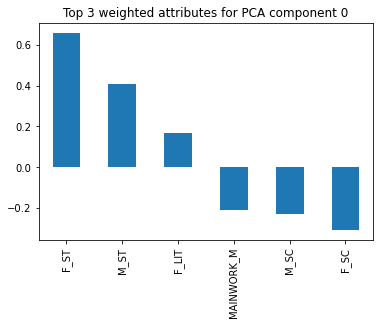

F_ST          0.66
M_ST          0.41
F_LIT         0.17
MAINWORK_M   -0.21
M_SC         -0.23
F_SC         -0.31
Name: 3, dtype: float64

In [74]:
def feature_weight(pca, n_comp, n_feat):
    #df = pd.DataFrame(np.round(pca.components_,2),columns = scaled_data.columns)
    comp = pd.DataFrame(np.round(pca.components_, 2), columns=data.keys()).iloc[n_comp - 1]
    comp.sort_values(ascending=False, inplace=True)
    comp = pd.concat([comp.head(n_feat), comp.tail(n_feat)])
    comp.plot(kind='bar', title='Top {} weighted attributes for PCA component {}'.format(n_feat, n_comp))
    plt.show()
    return comp
feature_weight(reducer,0,3)

# Part 2.7 - PCA: Write linear equation for first PC.